# Changing the default parameters

`pypsv` uses several default parameters, that can be found in the `parameters.py` file. If you'd like to change these, you can import the `parameters` module and monkey-patch the parameter values, before initiating the model curve:

In [1]:
import numpy as np
from pandas import DataFrame

input_data = DataFrame(
    data={
        'F': [40, 45],
        'dF': [1.25, 0.7],
        'Age': [879., 1595.],
        'dAge': [20, np.nan],
        'Age type': ["14C SH", "absolute"],
    },
)

# Fiji latitude and longitude
loc = (-18.166667, 178.45)
curve_knots = np.arange(1000, 2001, 20)

First, we import the relevant modules:

In [2]:
from pypsv import PSVCurve
from pypsv import parameters

/home/arthus/miniforge3/envs/mcmc/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Then we can change the default parameters, for example the default axial dipole strength:

In [3]:
parameters.AXIAL_DIPOLE_PRIOR = -20

Then we generate a curve with the updated parameters:

In [4]:
curve = PSVCurve(
    loc=loc,
    curve_knots=curve_knots,
    data=input_data,
)
idata = curve.sample()

Setting up PyMC model...
...model setup done.


Compiling.. :   0%|          | 0/1500 [00:00<?, ?it/s]





Running chain 0:   0%|          | 0/1500 [00:02<?, ?it/s]


Running chain 0:   5%|▌         | 75/1500 [00:02<00:05, 279.13it/s]






Running chain 0:  10%|█         | 150/1500 [00:03<00:06, 219.64it/s]




Running chain 0:  15%|█▌        | 225/1500 [00:03<00:05, 242.39it/s]


Running chain 0:  20%|██        | 300/1500 [00:03<00:04, 284.11it/s]


Running chain 0:  25%|██▌       | 375/1500 [00:03<00:03, 319.04it/s]

Running chain 0:  30%|███       | 450/1500 [00:04<00:02, 367.90it/s]


Running chain 0:  40%|████      | 600/1500 [00:04<00:02, 416.29it/s]

Running chain 0:  45%|████▌     | 675/1500 [00:04<00:01, 440.00it/s]


Running chain 0:  50%|█████     | 750/1500 [00:04<00:01, 444.94it/s]


Running chain 1: 100%|██████████| 1500/1500 [00:04<00:00, 304.37it/s]



Running chain 0:  60%|██████    | 900/1500 [00:05<00:01, 472.43it/s]


Running chain 0:  65%|██████▌   | 975/1500 [00:05<00:01, 451.28it/s]


Running chain 0:  90%|█

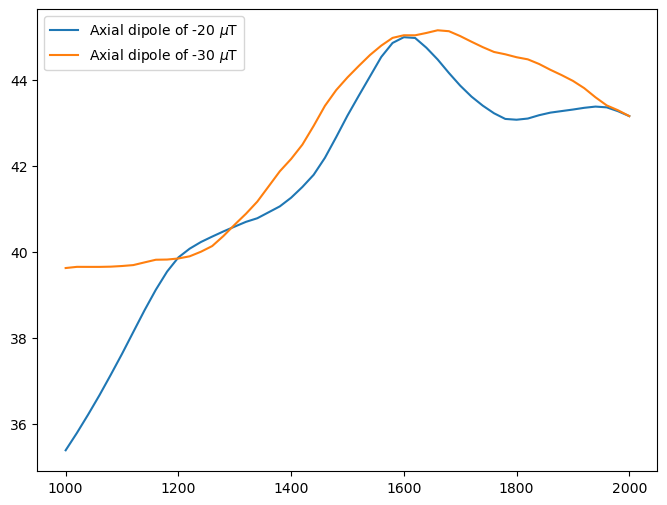

In [5]:
import arviz as az

from matplotlib import pyplot as plt
from pypsv.output import generate_curve_output

knots, curve_samples = generate_curve_output(idata, thin=2)

idata_ref = az.from_netcdf('./example_out.nc')
knots_ref, curve_samples_ref = generate_curve_output(idata_ref, thin=2)

fig, ax = plt.subplots(
    1, 1,
    figsize=(8, 6),
)

ax.plot(
    knots,
    curve_samples['F'].mean(axis=1),
    color='C0',
    label=r'Axial dipole of -20 $\mu$T',
    zorder=5,
)
ax.plot(
    knots_ref,
    curve_samples_ref['F'].mean(axis=1),
    color='C1',
    label=r'Axial dipole of -30 $\mu$T',
    zorder=5,
)
ax.legend()